# 1. Importing the libraries and dataset

In [3]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.shape

(200, 5)

In [5]:
X = dataset.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# 2. K-mean and Using the elbow method to find the optimal number of clusters

In [6]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init='k-means++')

In [8]:
kmeans.fit(X)
kmeans.inertia_

/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


44448.45544793371

/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

WCSS for k =  2 is 183069.1758275129
WCSS for k =  3 is 106348.3730621112
WCSS for k =  4 is 73679.78903948834
WCSS for k =  5 is 44448.45544793371
WCSS for k =  6 is 37265.86520484347
WCSS for k =  7 is 30273.394312070042
WCSS for k =  8 is 25028.020475269415
WCSS for k =  9 is 21850.165282585633
WCSS for k =  10 is 19636.753964898155
WCSS for k =  11 is 17508.97057740007


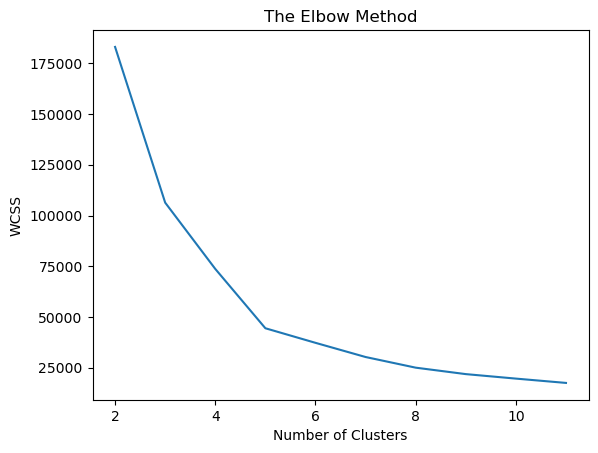

In [11]:
# Print Values of WCSS and Plit WCSS and k
wcss = []
for i in range(2,12):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

for k in range(0, len(wcss)):
    print("WCSS for k = ", k+2, "is", wcss[k])
import matplotlib.pyplot as plt
plt.plot(range(2,12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## According to the elbow method, the optimal number of clusters is 5

# 3. Predicting the clusters

In [14]:
kmeans = KMeans(n_clusters=5, init='k-means++')
Y = kmeans.fit_predict(X)
Y

/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 1, 4, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

# 4. Calculate the silhoutte score

In [15]:
from sklearn import metrics
score = metrics.silhouette_score(X, Y)
score

0.553931997444648

/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

Silhouette score for k =  2 is 0.2968969162503008
Silhouette score for k =  3 is 0.46761358158775435
Silhouette score for k =  4 is 0.4931963109249047
Silhouette score for k =  5 is 0.553931997444648
Silhouette score for k =  6 is 0.53976103063432
Silhouette score for k =  7 is 0.5281944387251989
Silhouette score for k =  8 is 0.4531650787816753


/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k =  9 is 0.461684164916706
Silhouette score for k =  10 is 0.44760979994374317
Silhouette score for k =  11 is 0.444475827825336


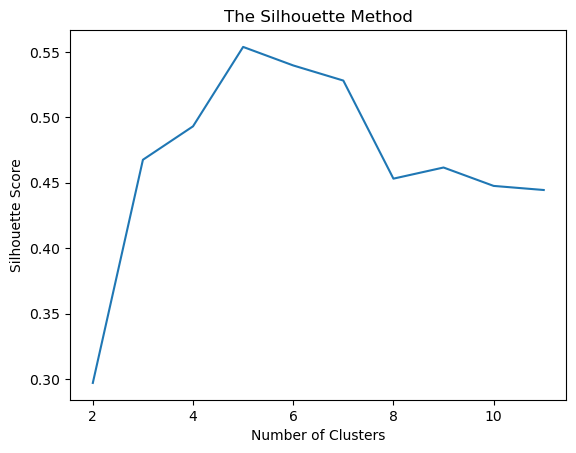

In [17]:
## Iterate the process for different values of k (2-11) and find the optimal value of k and plot the score
import matplotlib.pyplot as plt
silhouette_scores = []
for k in range(2,12):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    Y = kmeans.fit_predict(X)
    score = metrics.silhouette_score(X, Y)
    silhouette_scores.append(score)
    print("Silhouette score for k = ", k, "is", score)

plt.plot(range(2,12), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## According to the silhouette method, the optimal number of clusters is 5.

# 5. Visualizing the clusters

In [29]:
def show_clusters(X, Y):
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='plasma')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Clusters of customers')
    plt.show()

/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


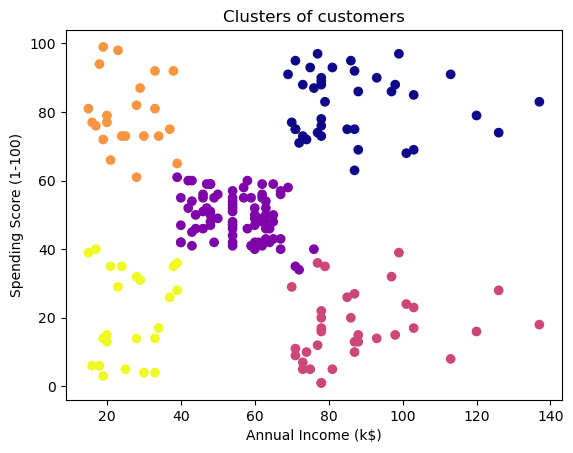

In [19]:
# Use k=5 to create the kmean model to visualize the clusters
kmeans = KMeans(n_clusters=5, init='k-means++')
Y = kmeans.fit_predict(X)
show_clusters(X, Y)

In [20]:
!pip install fuzzy-c-means

  Obtaining dependency information for pydantic<2.0.0,>=1.9.0 from https://files.pythonhosted.org/packages/b8/ae/8c3ffe3dafeaeb0fa08d6622e7fb074c7f42921fe8916c8de6f47662f9a4/pydantic-1.10.12-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.3/149.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.7 MB/s eta 0:00:00a 0:00:01


# 6. Fuzzy C-means

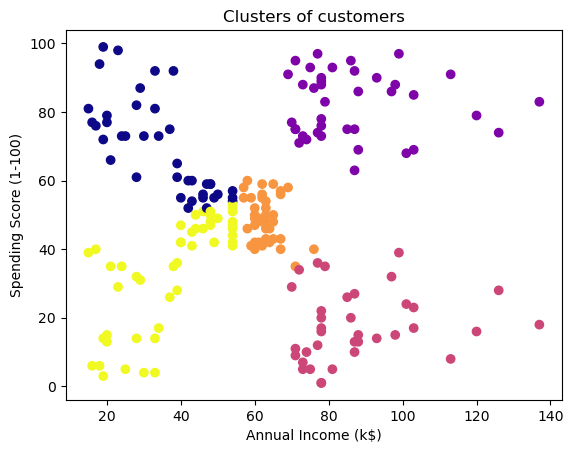

In [24]:
from fcmeans import FCM

m = 6
fcm = FCM(n_clusters=5, m=m)
fcm.fit(X)

# outputs
Y = fcm.predict(X)
show_clusters(X, Y)

Silhouette score for m =  2 is 0.553931997444648
Silhouette score for m =  3 is 0.42160912998611855
Silhouette score for m =  4 is 0.40652661676250046
Silhouette score for m =  5 is 0.3652691221125459
Silhouette score for m =  6 is 0.20272769789562883
Silhouette score for m =  7 is 0.3106896109890418
Silhouette score for m =  8 is 0.30423332988764096
Silhouette score for m =  9 is 0.24058729639347756
Silhouette score for m =  10 is 0.17128973597760414
Silhouette score for m =  11 is 0.2020005634254137
Silhouette score for m =  12 is 0.16916564438186232
Silhouette score for m =  13 is 0.20553410465749175
Silhouette score for m =  14 is 0.12191426147485494
Silhouette score for m =  15 is 0.0766282477702983
Silhouette score for m =  16 is 0.19972943541789853
Silhouette score for m =  17 is 0.18982376072181503
Silhouette score for m =  18 is 0.112894157480187
Silhouette score for m =  19 is 0.23589496575209878


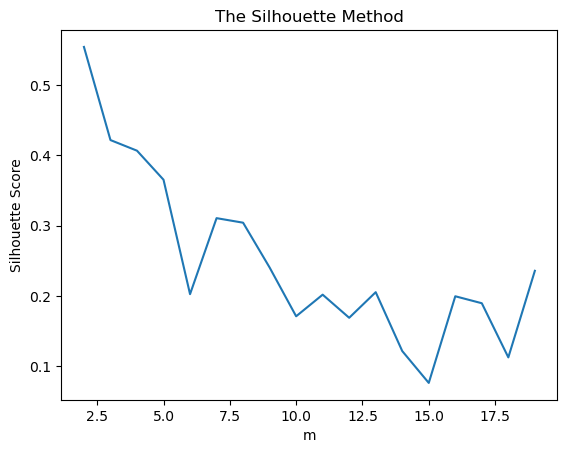

In [26]:
# Visualize and find the best m for FCM
m_values = []
silhouette_scores = []

for m in range(2, 20):
    fcm = FCM(n_clusters=5, m=m)
    fcm.fit(X)
    Y = fcm.predict(X)
    score = metrics.silhouette_score(X, Y)
    silhouette_scores.append(score)
    m_values.append(m)
    print("Silhouette score for m = ", m, "is", score)

plt.plot(m_values, silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('m')
plt.ylabel('Silhouette Score')
plt.show()

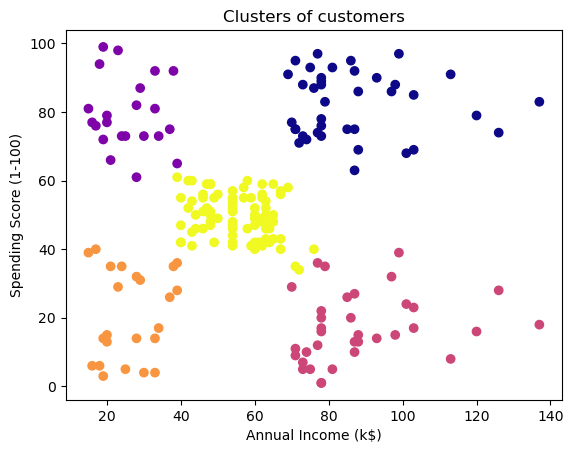

In [27]:
# According to the silhouette method, the optimal value of m is 2.

m = 2
fcm = FCM(n_clusters=5, m=m)
fcm.fit(X)

# outputs
Y = fcm.predict(X)
show_clusters(X, Y)

# 7. Density-based spatial clustering of applications with noise (DBSCAN)

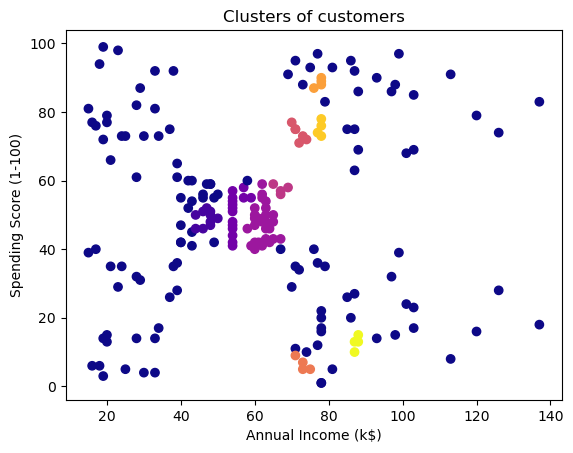

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=3, min_samples=4)
dbscan.fit(X)

Y = dbscan.fit_predict(X)
show_clusters(X, Y)

Silhouette score for eps =  1 and min_samples =  1 is 0.04
Silhouette score for eps =  1 and min_samples =  2 is -0.5037755483679244
Silhouette score for eps =  2 and min_samples =  1 is 0.04
Silhouette score for eps =  2 and min_samples =  2 is -0.5037755483679244
Silhouette score for eps =  3 and min_samples =  1 is 0.04
Silhouette score for eps =  3 and min_samples =  2 is -0.5037755483679244
Silhouette score for eps =  4 and min_samples =  1 is 0.04
Silhouette score for eps =  4 and min_samples =  2 is -0.5037755483679244
Silhouette score for eps =  5 and min_samples =  1 is 0.04
Silhouette score for eps =  5 and min_samples =  2 is -0.5037755483679244
Silhouette score for eps =  6 and min_samples =  1 is 0.04
Silhouette score for eps =  6 and min_samples =  2 is -0.5037755483679244
Silhouette score for eps =  7 and min_samples =  1 is 0.04
Silhouette score for eps =  7 and min_samples =  2 is -0.5037755483679244
Silhouette score for eps =  8 and min_samples =  1 is 0.04
Silhouette

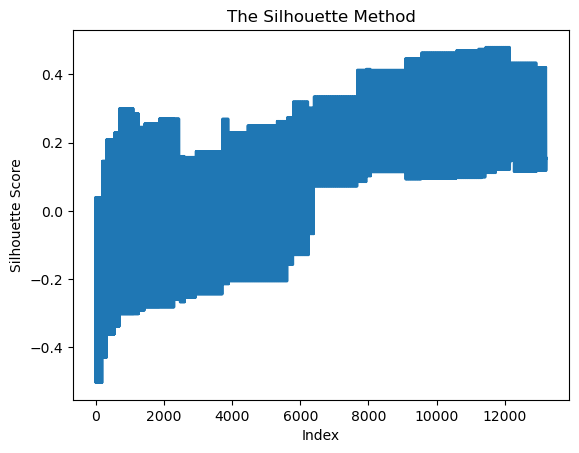

The best eps is 906
The best min_samples is 3


In [57]:
# Visualize and find the best eps and min_samples for DBSCAN

eps_values = []
min_samples_values = []
silhouette_scores = []

for eps in range(1, 1000):
    for min_samples in range(1, 20):

        dbscan = DBSCAN(eps=eps/100, min_samples=min_samples)
        dbscan.fit(X)
        Y = dbscan.fit_predict(X)
        try:
            score = metrics.silhouette_score(X, Y)
        except:
            continue
        silhouette_scores.append(score)
        eps_values.append(eps)
        min_samples_values.append(min_samples)
        print("Silhouette score for eps = ", eps/100, "and min_samples = ", min_samples, "is", score)

plt.plot(range(0, len(silhouette_scores)), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Index')
plt.ylabel('Silhouette Score')
plt.show()
print("The best eps is", eps_values[silhouette_scores.index(max(silhouette_scores))])
print("The best min_samples is", min_samples_values[silhouette_scores.index(max(silhouette_scores))])

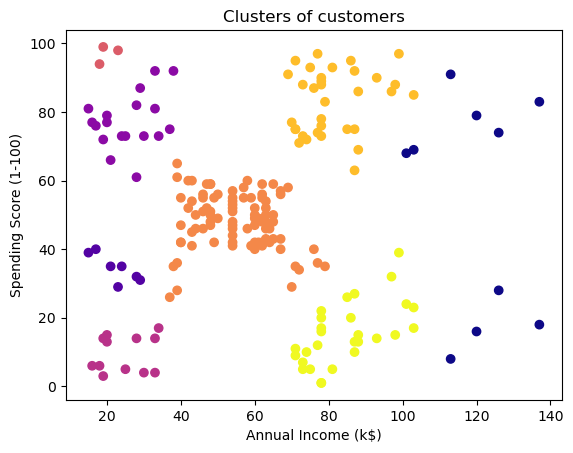

In [58]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=9.06, min_samples=3)
dbscan.fit(X)

Y = dbscan.fit_predict(X)
show_clusters(X, Y)

# 8. Moon dataset

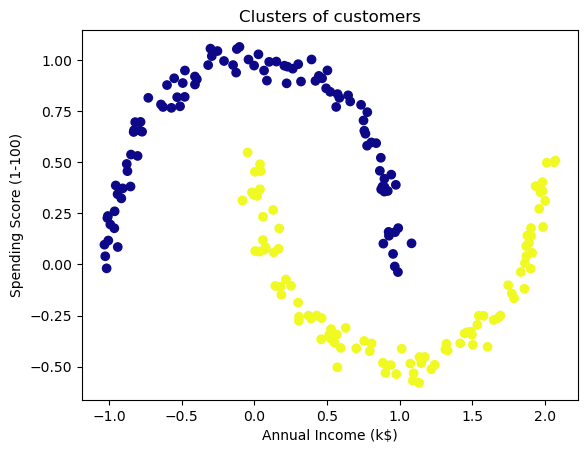

In [43]:
from sklearn.datasets import make_moons

moons_X, moons_Y = make_moons(n_samples=200, noise=0.05)
show_clusters(moons_X, moons_Y)

# 9. K-means on Moon dataset

## 9.1 find the optimal value of k on Moon dataset

/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

WCSS for k =  2 is 79.25605404352608
WCSS for k =  3 is 53.25757883611413
WCSS for k =  4 is 34.89953944884117
WCSS for k =  5 is 26.804749675022244
WCSS for k =  6 is 18.53129810865206
WCSS for k =  7 is 14.570934127257505
WCSS for k =  8 is 10.363633378329528
WCSS for k =  9 is 8.510583423981771
WCSS for k =  10 is 6.740601416116773
WCSS for k =  11 is 5.827688566514409


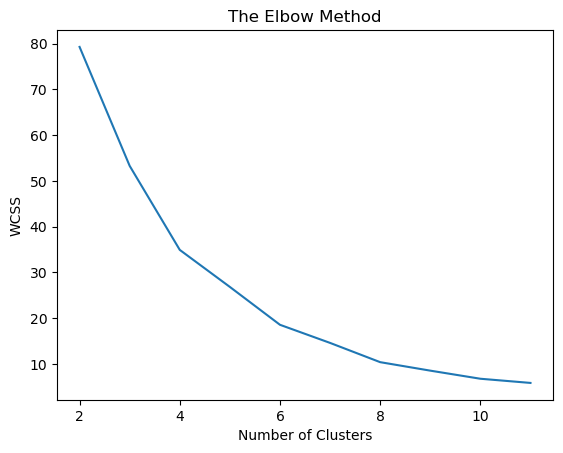

In [44]:
wcss = []
for i in range(2,12):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(moons_X)
    wcss.append(kmeans.inertia_)

for k in range(0, len(wcss)):
    print("WCSS for k = ", k+2, "is", wcss[k])

plt.plot(range(2,12), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## According to the elbow method, the optimal number of clusters is 8

# 9.2 Calculate the silhoutte score

/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

Silhouette score for k =  2 is 0.4928482276156707
Silhouette score for k =  3 is 0.42509790877975034
Silhouette score for k =  4 is 0.448174986773017
Silhouette score for k =  5 is 0.4775639251762724
Silhouette score for k =  6 is 0.4910326979838219
Silhouette score for k =  7 is 0.5104875824397065
Silhouette score for k =  8 is 0.5390413364224672


/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette score for k =  9 is 0.5351729929557076
Silhouette score for k =  10 is 0.5332284096099636
Silhouette score for k =  11 is 0.5220702158855556


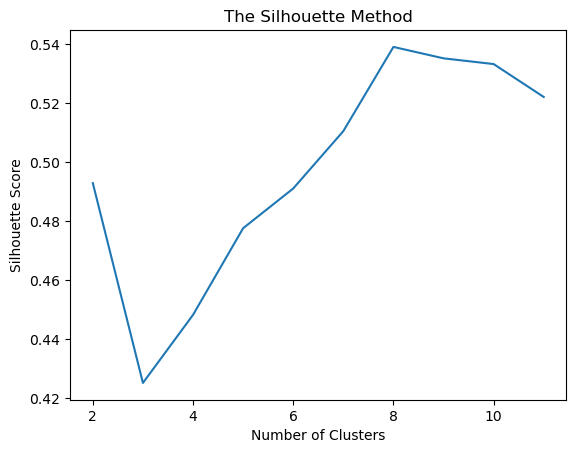

In [45]:
silhouette_scores = []
for k in range(2,12):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    Y = kmeans.fit_predict(moons_X)
    score = metrics.silhouette_score(moons_X, Y)
    silhouette_scores.append(score)
    print("Silhouette score for k = ", k, "is", score)

plt.plot(range(2,12), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## According to the silhouette method, the optimal number of clusters is 8.

## 9.3 Predict the clusters

/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


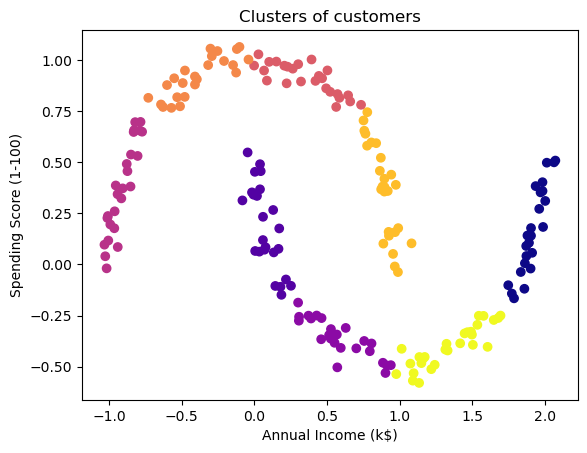

In [46]:
kmeans = KMeans(n_clusters=8, init='k-means++')
Y = kmeans.fit_predict(moons_X)
show_clusters(moons_X, Y)

/home/u6410322/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


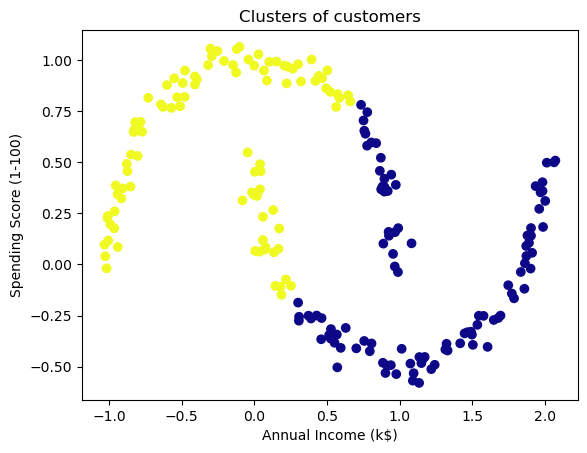

In [47]:
kmeans = KMeans(n_clusters=2, init='k-means++')
Y = kmeans.fit_predict(moons_X)
show_clusters(moons_X, Y)

# 10. DBSCAN on Moon dataset

## 10.1 find the best eps and min_samples for DBSCAN on Moon dataset

Silhouette score for eps =  0.01 and min_samples =  1 is 0.007772827468407807
Silhouette score for eps =  0.01 and min_samples =  2 is 0.07886982179125618
Silhouette score for eps =  0.02 and min_samples =  1 is 0.10148425378796162
Silhouette score for eps =  0.02 and min_samples =  2 is -0.5311690284435682
Silhouette score for eps =  0.02 and min_samples =  3 is -0.21600469554693
Silhouette score for eps =  0.03 and min_samples =  1 is 0.1922866428732271
Silhouette score for eps =  0.03 and min_samples =  2 is -0.32890528351973464
Silhouette score for eps =  0.03 and min_samples =  3 is -0.4757195193573039
Silhouette score for eps =  0.03 and min_samples =  4 is -0.2630334070002248
Silhouette score for eps =  0.03 and min_samples =  5 is -0.19641931337170726
Silhouette score for eps =  0.04 and min_samples =  1 is 0.27596098438344246
Silhouette score for eps =  0.04 and min_samples =  2 is 0.01569410540078338
Silhouette score for eps =  0.04 and min_samples =  3 is -0.3169381436647331

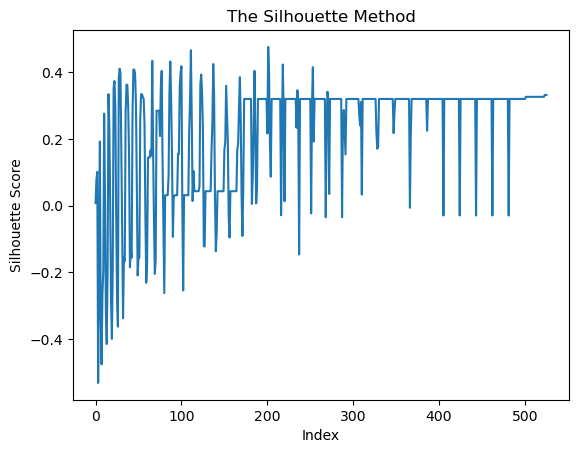

The best eps is 21
The best min_samples is 13


In [60]:
eps_values = []
min_samples_values = []
silhouette_scores = []

for eps in range(1, 1000):
    for min_samples in range(1, 20):
        dbscan = DBSCAN(eps=eps/100, min_samples=min_samples)
        dbscan.fit(moons_X)
        Y = dbscan.fit_predict(moons_X)
        try:
            score = metrics.silhouette_score(moons_X, Y)
        except:
            continue
        silhouette_scores.append(score)
        eps_values.append(eps)
        min_samples_values.append(min_samples)
        print("Silhouette score for eps = ", eps/100, "and min_samples = ", min_samples, "is", score)

plt.plot(range(0, len(silhouette_scores)), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Index')
plt.ylabel('Silhouette Score')
plt.show()
maxscore = max(silhouette_scores)
print("The best eps is", eps_values[silhouette_scores.index(maxscore)])
print("The best min_samples is", min_samples_values[silhouette_scores.index(maxscore)])

## 10.2 Predict the clusters

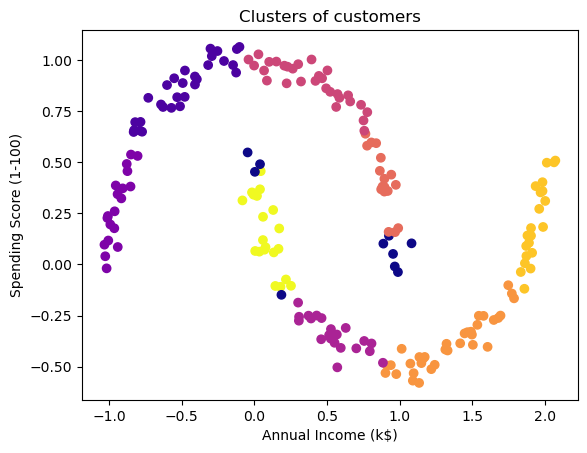

In [61]:
dbscan = DBSCAN(eps=0.21, min_samples=13)
dbscan.fit(moons_X)

Y = dbscan.fit_predict(moons_X)
show_clusters(moons_X, Y)

# 11. Self-organizing map (SOM)

In [62]:
!pip install sklearn_som

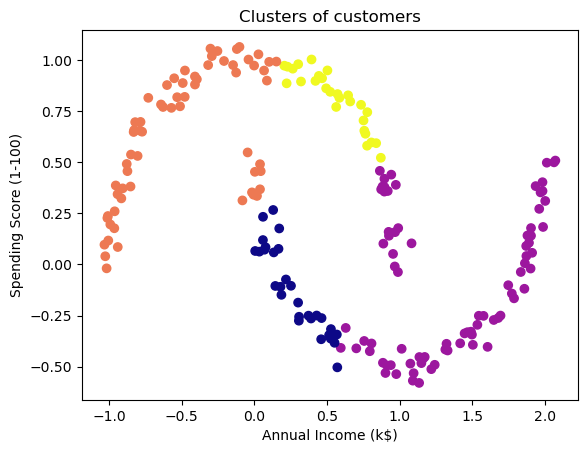

In [69]:
from sklearn_som.som import SOM

som = SOM(m=2, n=2, dim=2)
som.fit(moons_X)

Y = som.predict(moons_X)
show_clusters(moons_X, Y)

# 12. SOM on Mall dataset

## 12.1 Visualize the clusters

In [70]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

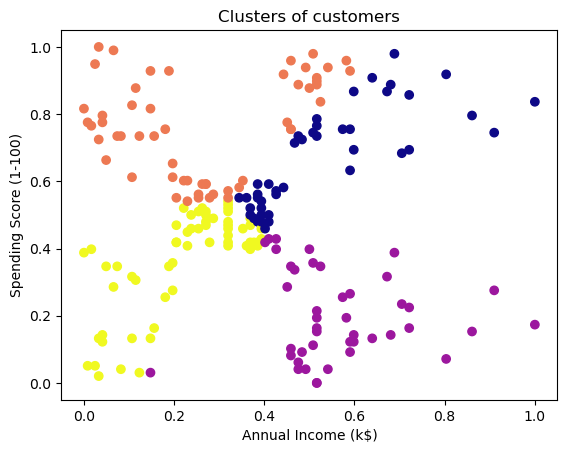

In [71]:
from sklearn_som.som import SOM

som = SOM(m=2, n=2, dim=2)
som.fit(X)

Y = som.predict(X)
show_clusters(X, Y)

## 12.2 find the best m and n for SOM on Mall dataset

Silhouette score for m =  1 and n =  2 is 0.3233772738261615
Silhouette score for m =  1 and n =  3 is 0.3193678590655975
Silhouette score for m =  1 and n =  4 is 0.27932176041130297
Silhouette score for m =  1 and n =  5 is 0.41638979726177455
Silhouette score for m =  1 and n =  6 is 0.4133261289497443
Silhouette score for m =  1 and n =  7 is 0.3035309321915081
Silhouette score for m =  1 and n =  8 is 0.27384485566827904
Silhouette score for m =  1 and n =  9 is 0.34460306935575064
Silhouette score for m =  2 and n =  1 is 0.32502351116115163
Silhouette score for m =  2 and n =  2 is 0.17270594493287408
Silhouette score for m =  2 and n =  3 is 0.3398901728338447
Silhouette score for m =  2 and n =  4 is 0.36022710906450256
Silhouette score for m =  2 and n =  5 is 0.23498747734963168
Silhouette score for m =  2 and n =  6 is 0.3090398975502739
Silhouette score for m =  2 and n =  7 is 0.22075979953042732
Silhouette score for m =  2 and n =  8 is 0.3069911060277366
Silhouette scor

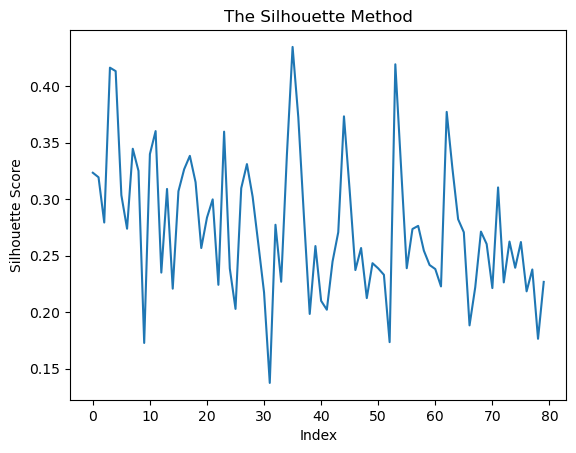

The best m is 5
The best n is 1


In [73]:

m_values = []
n_values = []
silhouette_scores = []

for m in range(1, 10):
    for n in range(1, 10):
        som = SOM(m=m, n=n, dim=2)
        som.fit(X)
        Y = som.predict(X)
        try:
            score = metrics.silhouette_score(X, Y)
        except:
            continue
        silhouette_scores.append(score)
        m_values.append(m)
        n_values.append(n)
        print("Silhouette score for m = ", m, "and n = ", n, "is", score)

plt.plot(range(0, len(silhouette_scores)), silhouette_scores)
plt.title('The Silhouette Method')
plt.xlabel('Index')
plt.ylabel('Silhouette Score')
plt.show()

maxscore = max(silhouette_scores)
print("The best m is", m_values[silhouette_scores.index(maxscore)])
print("The best n is", n_values[silhouette_scores.index(maxscore)])


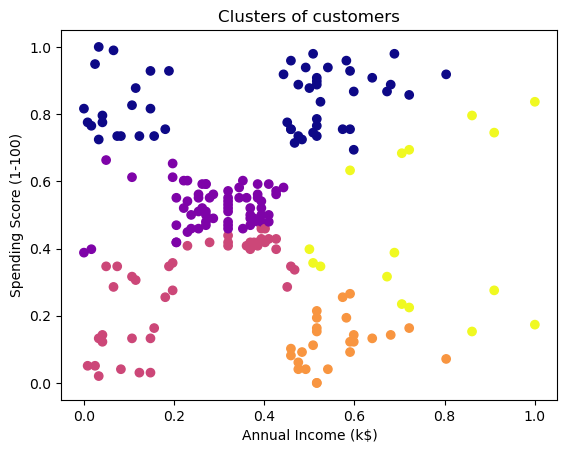

In [74]:
from sklearn_som.som import SOM

som = SOM(m=5, n=1, dim=2)

som.fit(X)

Y = som.predict(X)
show_clusters(X, Y)